In [26]:
library(adoptr)
library(dplyr)

options(repr.plot.width=12, repr.plot.height=6)

In [29]:
H0 <- PointMassPrior(.0, 1)
H1 <- ContinuousPrior(function(theta) dnorm(theta, 0.5, 0.2)/(pnorm(1, 0.5, 0.2) - pnorm(0, 0.5, 0.2)), c(0, 1))

In [30]:
 ESS <- ExpectedSampleSize(Normal(two_armed = FALSE), H1)
  EP <- Power(Normal(two_armed = FALSE), H1)
TOER <- Power(Normal(two_armed = FALSE), H0)
  PP <- ConditionalPower(Normal(two_armed = FALSE), H1)

In [36]:
res <- minimize(
    ESS,
    subject_to(
          EP >= 0.8,
        TOER <= 0.025,
          PP >= 0.8
    ),
    get_initial_design(
        theta = .4,
        alpha = .025,
        beta  = .2,
        type  = "two-stage",
        dist  = Normal(two_armed = FALSE),
        order = 12L
    )
)

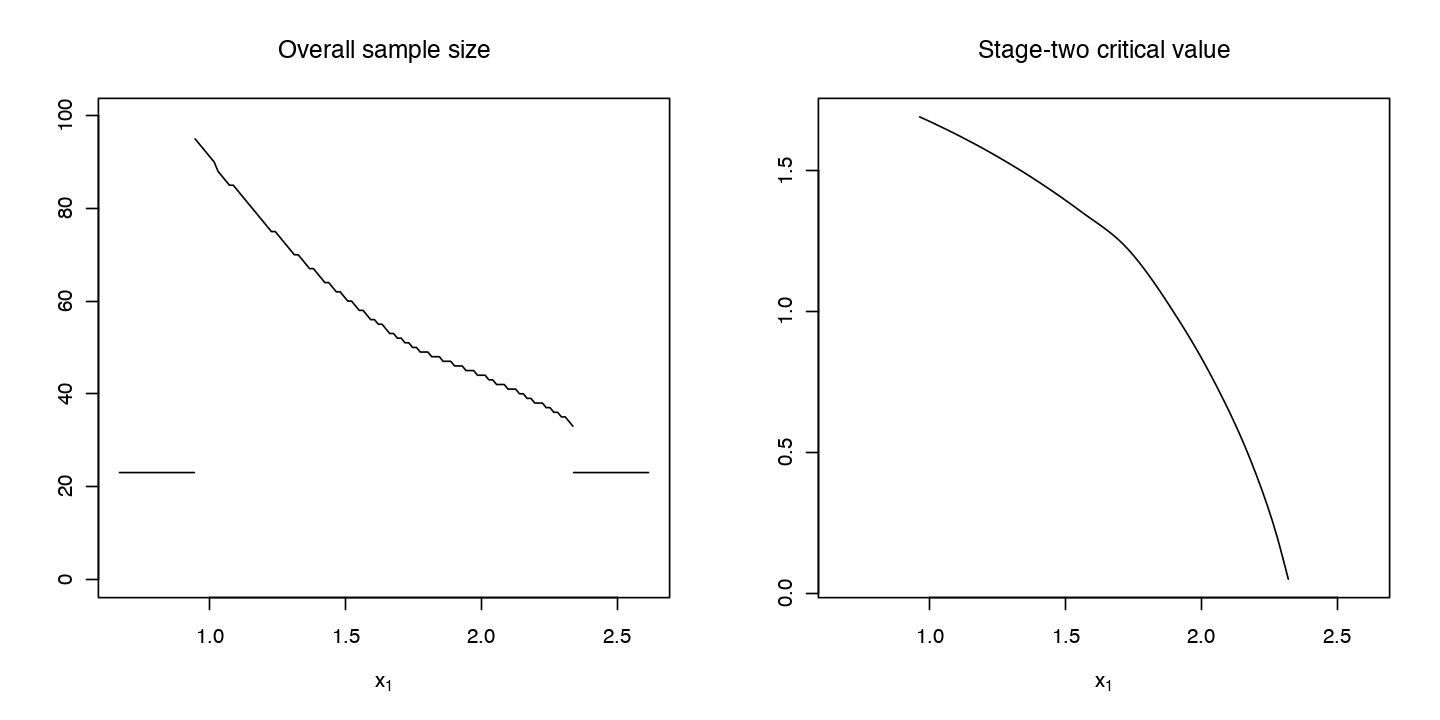

In [38]:
plot(res$design)